In [32]:
import pandas as pd
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [9]:
titanic_df = pd.read_csv("data/titanic.csv")

In [10]:
titanic_df = titanic_df.fillna("None")
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,None,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,None,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,None,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,None,None,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328,None
1305,3,0,"Zabour, Miss. Thamine",female,None,1,0,2665,14.4542,None,C,None,None,None
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304,None
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,None,C,None,None,None


In [24]:
class_survived_df = titanic_df[['pclass','survived']]

In [77]:
source_1 = class_survived_df.groupby('pclass').mean()*100
source_2 = source_1.reset_index()

In [78]:
def make_class_plot():
    titanic_df = pd.read_csv("../data/titanic.csv").fillna("None")
    class_survived_df = titanic_df[['pclass','survived']]
    source_1 = class_survived_df.groupby('pclass').mean()*100
    source_2 = source_1.reset_index()
    chart = alt.Chart(source_2).mark_bar(size = 10, color = "red").encode(
        alt.X('survived:Q', title = "Rate of Survival"),
        alt.Y("pclass:O", title = "Class")
        ).properties(title = "Survival Rate by Class", width = 500, height=50)
    return chart

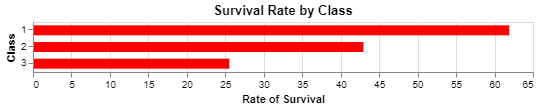

In [79]:
make_class_plot(source_2)